<a href="https://colab.research.google.com/github/SalamUddin844/Meningioma-Tumor-detection-using-EfficientNetV2L-/blob/main/Meningioma_Tumor_detection_using_EfficientNetV2L_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import os
import numpy as np
import random
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, MaxPooling2D
from keras.models import Model
from keras.applications import MobileNetV2,ResNet50,ResNet50V2,InceptionV3,InceptionResNetV2,Xception,VGG16,NASNetMobile,EfficientNetV2L
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras.utils as image
import seaborn as sns
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.image as mpimg
from PIL import Image
import shutil
sns.set()
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Tumor/New.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/Tumor/New.zip
   creating: Tumor/dataset/
   creating: Tumor/dataset/test/
   creating: Tumor/dataset/test/Meningioma Tumor/
  inflating: Tumor/dataset/test/Meningioma Tumor/005_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/006_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/01f05a1aec2026c602f9673e83929a_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/04a97c6a7fd1a7dbf153233a6dcc3a_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/04ecc1fb554216ad70719dd06ecb1da1b9dd312690b77bfdd5d02f75b79f5595_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/05dc7b88b51aec5c177c1bf29f8ea1186ccdb35933865bab3fe74f953adde2ad_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/0a25e590df927bd4c1ecb2621779d3_big_gallery.jpeg  
  inflating: Tumor/dataset/test/Meningioma Tumor/0a9b802958695fe58255e9124ba9e1_big_gallery.jpeg  
  inflating: Tumor/d

# **Directorys**

In [5]:
train_dir = '/content/Tumor/dataset/train'
test_dir = '/content/Tumor/dataset/test'
dir = '/content/Tumor/dataset/train'

# **Data Distribution**

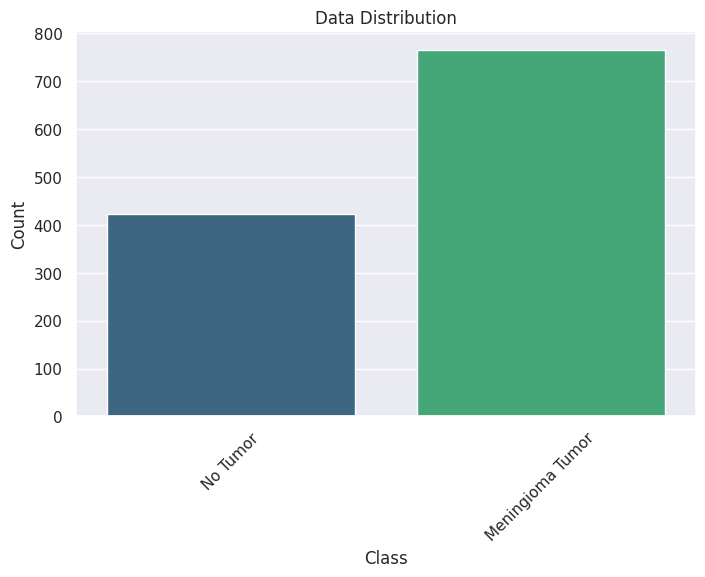

In [6]:
class_labels = os.listdir(dir)
image_counts = [len(os.listdir(os.path.join(dir, label))) for label in class_labels]
plt.figure(figsize=(8,5))
sns.barplot(x=class_labels, y=image_counts, palette="viridis")
plt.title('Data Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Augmention for Train,Test and Validation Set**

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
train_generator.class_indices
test_generator.class_indices
validation_generator.class_indices

Found 1188 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


{'Meningioma Tumor': 0, 'No Tumor': 1}

# **Data Visualization**

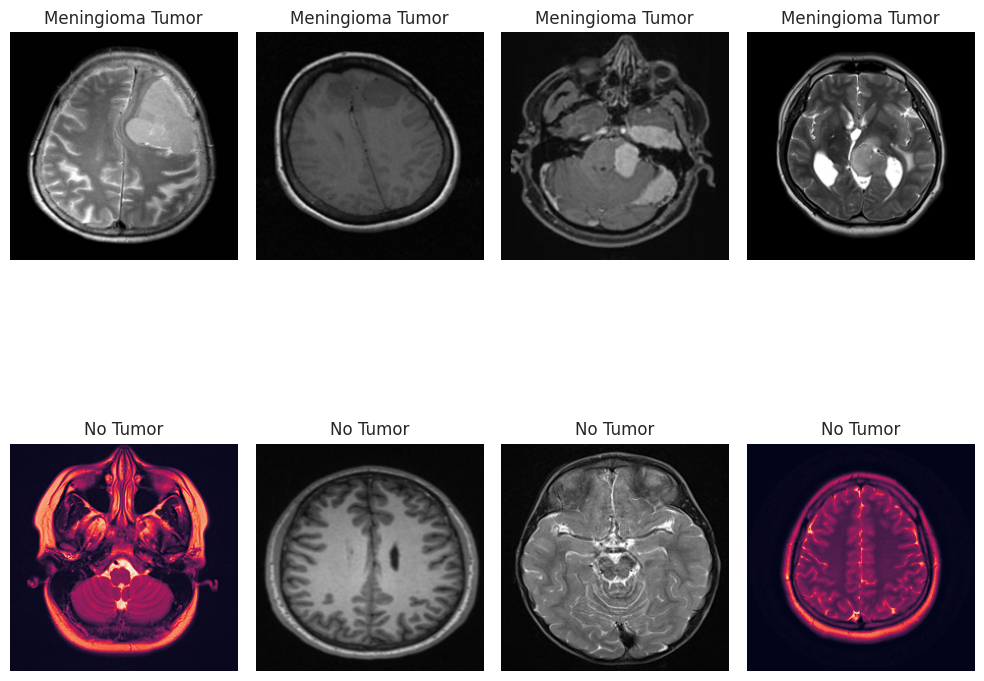

In [8]:
cataract_image_path = os.path.join(dir, "Meningioma Tumor")
normal_image_path = os.path.join(dir, "No Tumor")
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
class_labels = ["Meningioma Tumor", "No Tumor"]

for i, folder in enumerate([cataract_image_path, normal_image_path]):
    images = os.listdir(folder)
    for j in range(4):
        img_path = os.path.join(folder, images[j])
        img = Image.open(img_path)
        img = img.resize((224, 224))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(class_labels[i])

plt.tight_layout()
plt.show()

# **Model Architecture**

In [32]:

ef=EfficientNetV2L(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in ef.layers:
    layer.trainable=False
x=ef.output
x= Conv2D(filters=64,kernel_size=(3,3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x=Dropout(0.2)(x)
prediction=Dense(1,activation='sigmoid')(x)
model_2=Model(inputs=ef.input,outputs=prediction)
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()


473176280/473176280 [==============================] - 4s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                      

# **Model Train**

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // 32
)

Epoch 1/10
37/37 [==============================] - 10s 268ms/step - loss: 0.1858 - accuracy: 0.9221 - val_loss: 0.1954 - val_accuracy: 0.9323
Epoch 2/10
37/37 [==============================] - 10s 272ms/step - loss: 0.1495 - accuracy: 0.9351 - val_loss: 0.1596 - val_accuracy: 0.9479
Epoch 3/10
37/37 [==============================] - 13s 359ms/step - loss: 0.1510 - accuracy: 0.9343 - val_loss: 0.1840 - val_accuracy: 0.9375
Epoch 4/10
37/37 [==============================] - 16s 423ms/step - loss: 0.1240 - accuracy: 0.9593 - val_loss: 0.1623 - val_accuracy: 0.9427
Epoch 5/10
37/37 [==============================] - 11s 295ms/step - loss: 0.1040 - accuracy: 0.9663 - val_loss: 0.1691 - val_accuracy: 0.9271
Epoch 6/10
37/37 [==============================] - 10s 284ms/step - loss: 0.0910 - accuracy: 0.9689 - val_loss: 0.2043 - val_accuracy: 0.9479
Epoch 7/10
37/37 [==============================] - 10s 258ms/step - loss: 0.1042 - accuracy: 0.9593 - val_loss: 0.1470 - val_accuracy: 0.9531

# **Train and Validation Accuracy Visualization**

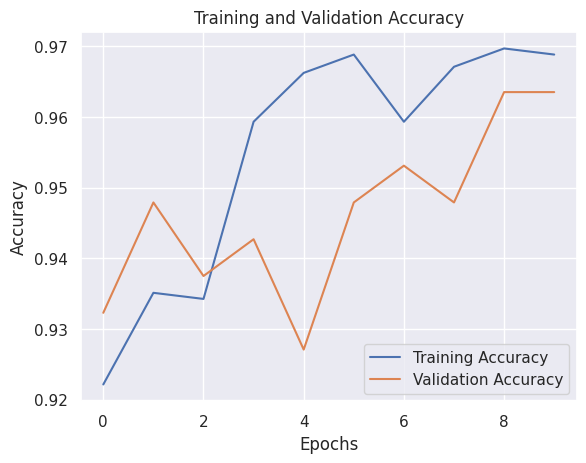

In [34]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# **Model Evalution**

In [35]:
train_loss, train_accuracy = model.evaluate(train_generator)
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")

validation_loss, validation_accuracy = model.evaluate(validation_generator)
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")


test_loss, test_accuracy = model.evaluate(test_generator)
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")


38/38 [==============================] - 9s 242ms/step - loss: 0.0910 - accuracy: 0.9672

----------------------------------------
----------------------------------------
Train Loss:          0.09098585695028305
Train Accuracy:      0.9671717286109924
7/7 [==============================] - 1s 93ms/step - loss: 0.1169 - accuracy: 0.9646

----------------------------------------
----------------------------------------
Validation Loss:     0.11689091473817825
Validation Accuracy: 0.9646464586257935
7/7 [==============================] - 1s 128ms/step - loss: 0.1169 - accuracy: 0.9646

----------------------------------------
----------------------------------------
Test Loss:           0.11689089983701706
Test Accuracy:       0.9646464586257935


# **Prediction**

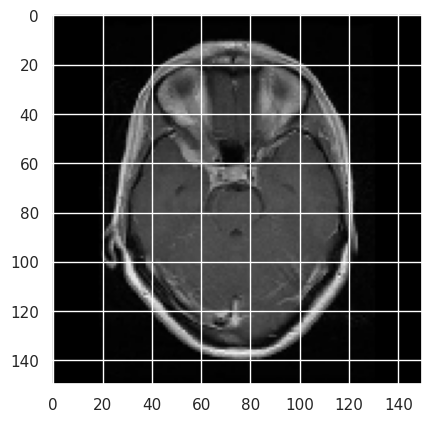

1/1 [==============================] - 0s 29ms/step
Meningioma Tumor


In [39]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = '/content/Tumor/dataset/test/Meningioma Tumor/006_big_gallery.jpeg'
img = image.load_img(img_path, target_size=(150, 150, 3))
plt.imshow(img, cmap='gray')
plt.show()

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

pred = model.predict(img)

if pred[0, 0] < 0.5:
    print("Meningioma Tumor")
else:
    print("Not Meningioma Tumor")


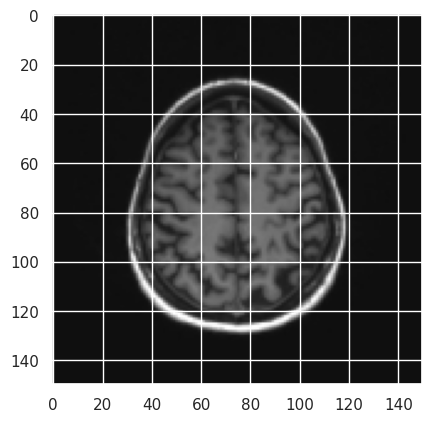

1/1 [==============================] - 0s 20ms/step
Not Meningioma Tumor


In [40]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = '/content/Tumor/dataset/test/No Tumor/03b8cddedf7fef67b544b2b2e546c9_big_gallery.jpeg'
img = image.load_img(img_path, target_size=(150, 150, 3))
plt.imshow(img, cmap='gray')
plt.show()

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

pred = model.predict(img)

if pred[0, 0] < 0.5:
    print("Meningioma Tumor")
else:
    print("Not Meningioma Tumor")
